<a href="https://colab.research.google.com/github/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Vijay Singh
##### **Team Member 2 -** Harshit Bansal
##### **Team Member 3 -** Sushmitha Kadam



# **Project Summary -**

**Introduction :**




Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year.

***CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*** More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

Changes in lifestyle, lack of exercise, increased stress, and other factors have all contributed to an increase in the number of persons suffering from cardiovascular ailments in recent years.People are more sensitive to cardiac illnesses for a variety of reasons, and these conditions can cause sudden death without warning.We can reduce prospective heart problems and live a healthier life if we grasp the underlying causes of such heart diseases.


The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**.

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.


The goal of this project is to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 3,390 records and 17 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.


**Dataset :**

**data_cardiovascular_risk.csv :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 3,390 records and 17 attributes. There are both demographic, behavioral, and medical risk factors.



**Conclusion:-**





# **GitHub Link -**

*   Vijay Singh :- https://github.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries



In [ ]:
# Import Libraries
#There are lots of libraries present in Python; we are importing some of them, which will be used further in this project.

# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

#Import other
from datetime import datetime
from importlib import reload

In [ ]:
# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Importing various machine learning models.
from sklearn.impute import KNNImputer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics


#save and load model in joblib file
import requests
from joblib import load
from io import BytesIO

### Dataset Loading

In [ ]:
# Load Dataset from github repository
# Below is the link of the github repository where we have uploaded our dataset
cvrp_data_url = 'https://raw.githubusercontent.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/main/data_cardiovascular_risk.csv'

In [ ]:
# Now we are going to read the dataset
cvrp_data = pd.read_csv(cvrp_data_url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
#Here we are going to take a look at the data that how its look like so we are using
#head() function which by default gives us the top 5 rows of the data
#and tail() function which gives us the bottom 5 rows of the data

In [ ]:
# View first 5 rows of the dataset
cvrp_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# View last 5 rows of the dataset
cvrp_data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#Here we are using shape function which tells us about the numbers of rows and columns in the dataset
print(f"The shape of cardiovascular risk prediction dataset is {cvrp_data.shape}")
print(f"Number of Rows in cardiovascular risk prediction dataset is     -  {cvrp_data.shape[0]}")
print(f"Number of Columns in cardiovascular risk prediction dataset is  -  {cvrp_data.shape[1]}")

The shape of cardiovascular risk prediction dataset is (3390, 17)
Number of Rows in cardiovascular risk prediction dataset is     -  3390
Number of Columns in cardiovascular risk prediction dataset is  -  17


### Dataset Information

In [ ]:
# Dataset Info
cvrp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
cvrp_data.duplicated().value_counts()

False    3390
dtype: int64

Total Number of Duplicate values in Cardiovascular risk prediction dataset is 0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking missing values/null values count for each column
cvrp_data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
na_data = cvrp_data.isnull().sum()
total_na_percentage = (na_data.sum()/cvrp_data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_na_percentage, 2)} %')

The total percentage of missing data is 15.04 %


<Axes: >

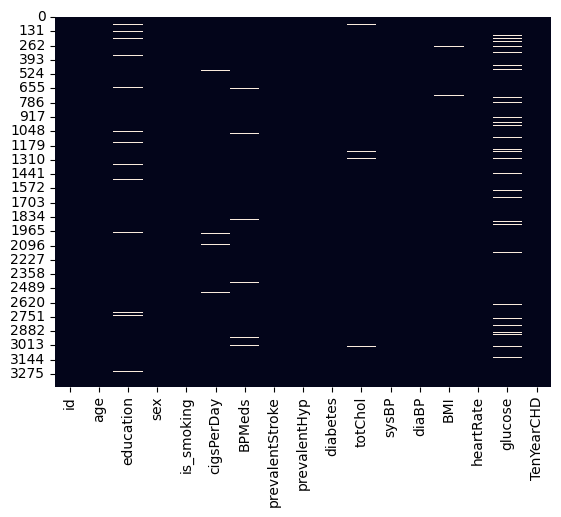

In [ ]:
# Visualizing the missing values
#To see the missing data we are going to use the heatmap method.
sns.heatmap(cvrp_data.isnull(), cbar=False)

### What did you know about your dataset?

#### **Dataset info :**

The dataset is from an ongoing cardiovascular study. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information.

It includes over 3,390 records and 17 attributes.

Cardiovascular risk prediction dataset has **17 variables** and **3390 observations**.and there are **510 (around 15.04%) observations are missing** and it contains **Zero duplicate rows**.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cvrp_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
cvrp_data.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description


 **The dataset contains patient's information. (Each attribute is a potential risk factor). There are both demographic, behavioral, and medical risk factors.**


**Attribute Information:**

**1).Demographic:**

* **Sex**: male or female("M" or "F")

* **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

* **Education**: No further information provided

**2).Behavioral:**

* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**3).Medical( history):**

* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

* **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

* **Tot Chol**: total cholesterol level (Continuous)

* **Sys BP**: systolic blood pressure (Continuous)

* **Dia BP**: diastolic blood pressure (Continuous)

* **BMI**: Body Mass Index (Continuous)

* **Heart Rate**: heart rate (Continuos)

* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**

* **TenYearCHD** :10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
cvrp_data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Making a copy of dataset
#data wrangling is the process of gathering,collecting and tranforming raw data into another format for better
#understanding, decision-making, accessing and analysis in less time.
#Before doing any data wrangling we are creating copy of our original dataset so any changes don't affect our original dataset
cv=cvrp_data.copy()

In [ ]:
# defining continuous independent variables separately
continous_var = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# defining dependent variable
target_var= ['TenYearCHD']

In [ ]:
# defining categorical independent variables separately
categorical_var = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

#### What all manipulations have you done and insights you found?

Since the data we possess is already clean and well-structured, there is no requirement for us to make any alterations in this aspect

However, we have made modifications to the columns, including Changed the names of all the columns for ease of use.

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.


Finally, we have 3390 records rows and 17 columns of data that can be used to analyze and gain valuable insights into the business. With this data, we can make informed decisions and accurately predict future trends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **`1). Correlation Heatmap`**

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart 🌈 that shows us how closely related different variables are.

In [ ]:
# Finding correlation between different columns
cv.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


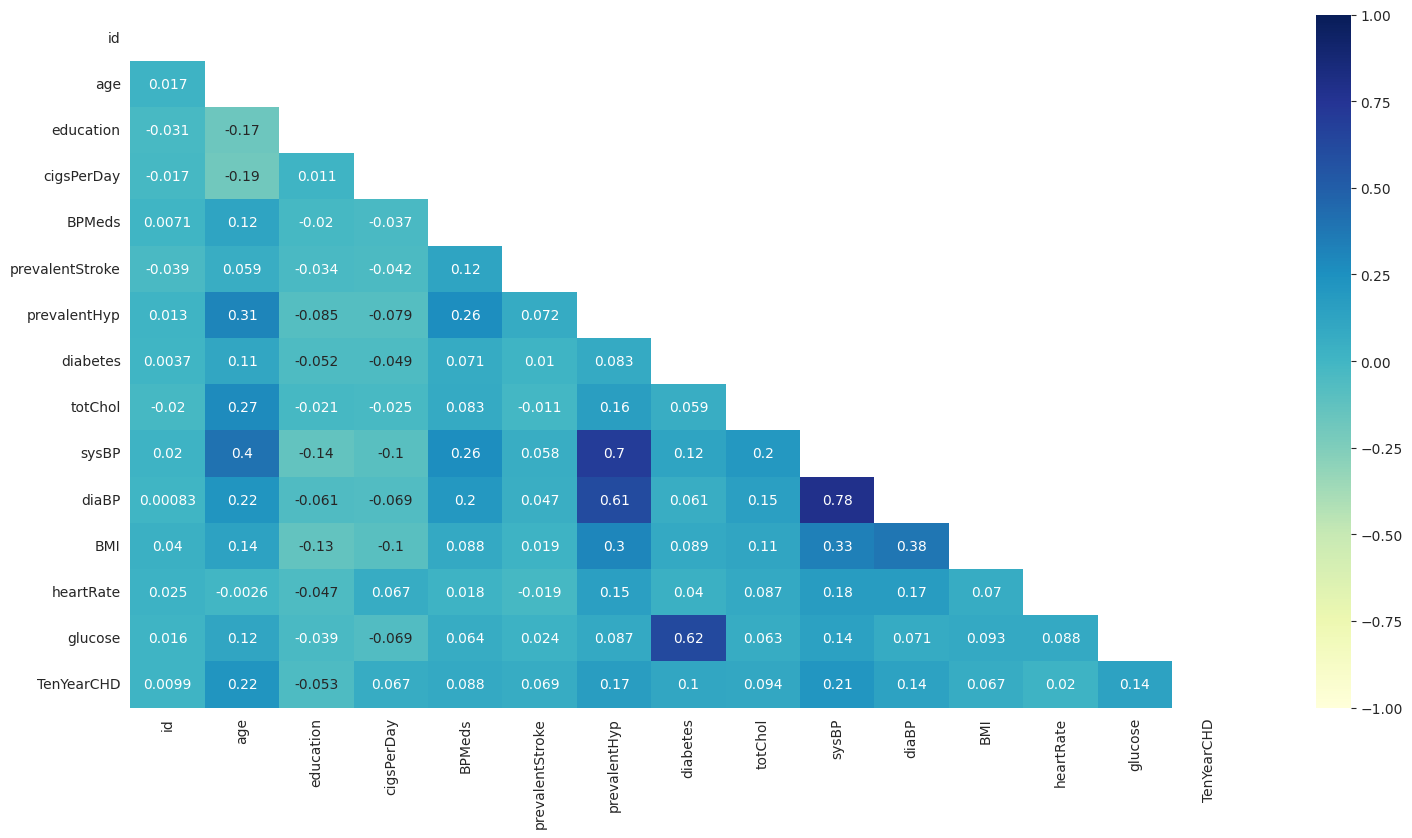

In [ ]:
# Heat map for Cardiovascular Risk Prediction
corr = cv.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62.
Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

### **`2).Pie Charts of Each categorical independent variables `**

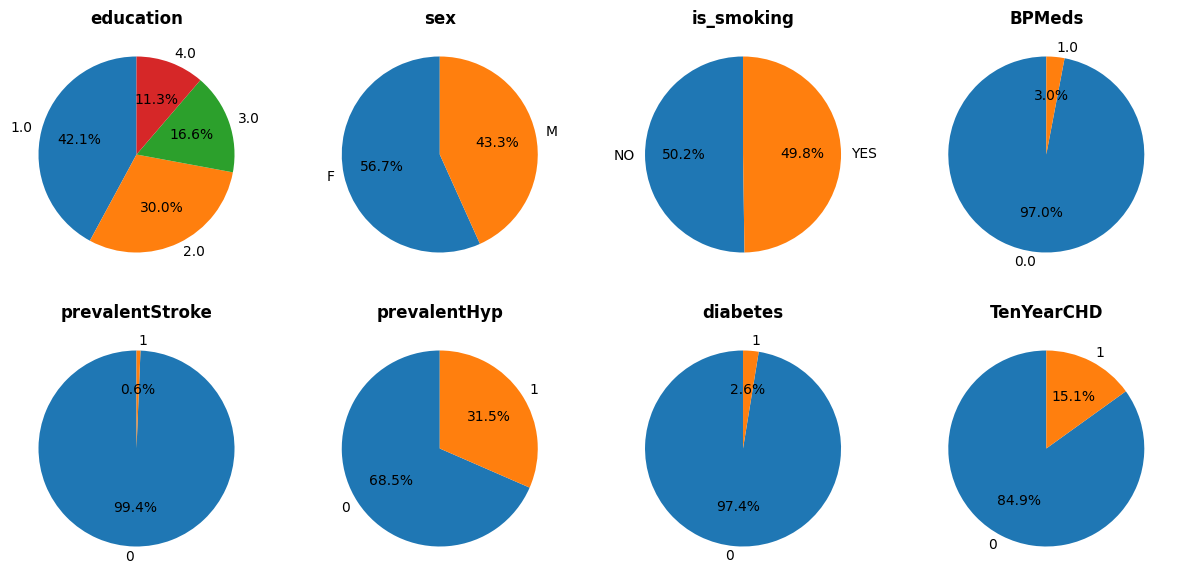

In [ ]:
#visualization code
list_of_variables=['education', 'sex', 'is_smoking', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
plt.figure(figsize=(15,7))
# categorical data
for i,col in enumerate(list_of_variables):
  counts = cvrp_data[col].value_counts()
  plt.subplot(2,4,i+1)
  # Plot the donut chart
  plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
  plt.title(f'{col}',weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The above charts have been used to find the proportions of each category present in each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from the above charts.
* 42.1% people have education level 1, 30.0% people have education level 2, only 16.6% and 11.3% people have education levels 3 and 4, resepectively.

* In our dataset, 56.7% are females and 43.3% are males.

* Approximately half of the people don't smoke.

* And 18% people smoke 20 cigarettes per day.
* 97% people don't take BP meds.
* Only 0.6% people had earlier stroke.
* 68.5% people have prevalent hypertension and 31.5% haven't.
* Only 2.6% people have diabetes
* In our data, approximately 85% people don't have CHD and 15% people have CHD.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights suggest that the data is imbalanced.

### **`3).Plot for Each Continuous Variables (Univariate)`**


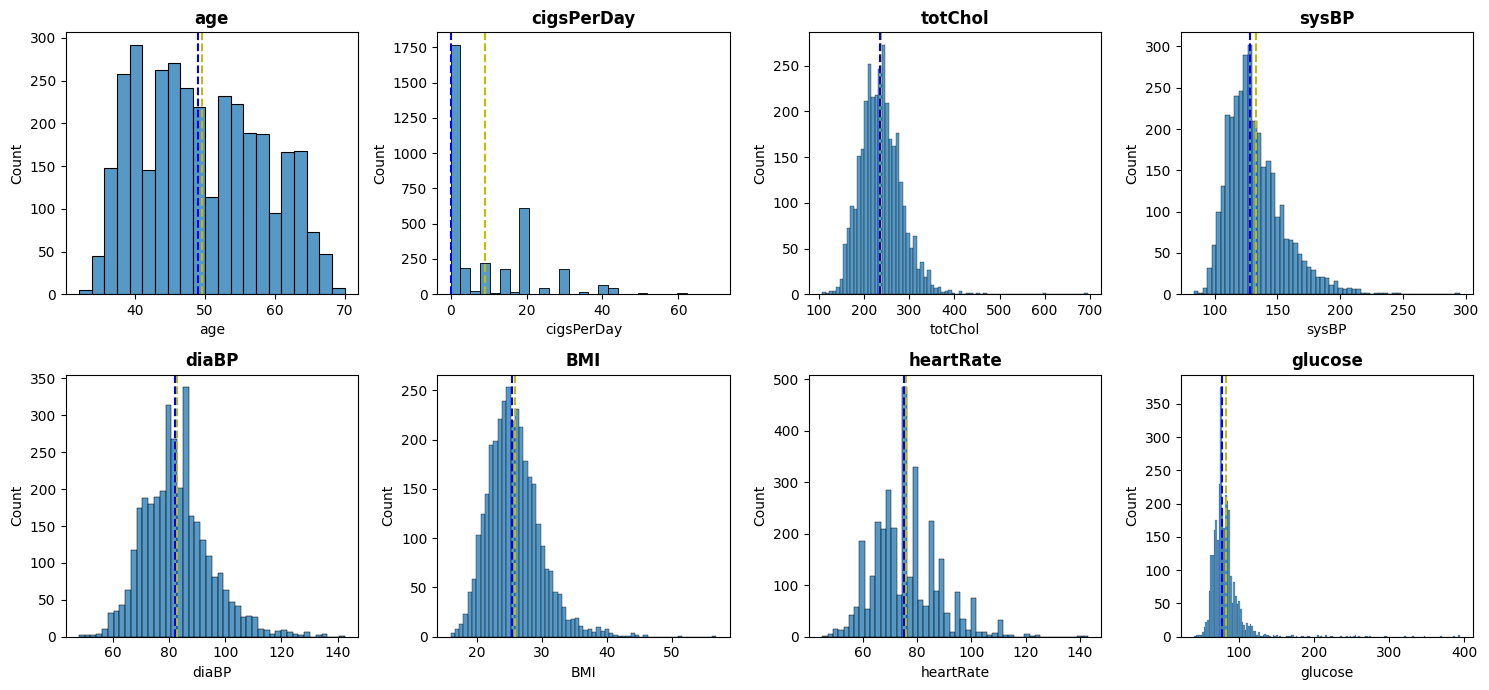

In [ ]:
#visualization code
#Check the distribution of each numerical columns using histogram
plt.figure(figsize=(15,7))
for i,col in enumerate(continous_var):
  ax=plt.subplot(2,4,i+1)
  sns.histplot(cvrp_data[col])
  ax.axvline(cvrp_data[col].mean(),color='y',linestyle='--')
  ax.axvline(cvrp_data[col].median(),color='b',linestyle='--')
  plt.title(f'{col}',weight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histogram are used to find the outliers in the data, check the distribution, skewness, etc. of any continuous variable present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights we gained from the above plot.
* The maximum people lies between the age 37 and 55 years in the available dataset.
* Most people (approx 1750) don't smoke, and 20 cigs per day is consumed by approximately 625 people.
* Total cholestrol follows a normal distribution except there are some outliers in the data.
* Systolic BP follows an approximetly normal distribution. It has some outliers, and it shows a positive skewness (very little).
* The diastolic BP denotes a bell curve except when diaBP is around 80.
* BMI column shows a normal distribution but it has a few outliers.
* Most people's heart rate lies between 60 and 90.
* Glucose has lot of outliers in the right so, it is a positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights helps in modeling. These insights will help us in data transformation, scaling the data, etc.
From this chart, we get a lot of insights about the numerical columns, and it will lead to a good business impact (to detect the CHD at earliest).

### **`4).Plot between each categorical variable and the target variable (Bivariate)`**

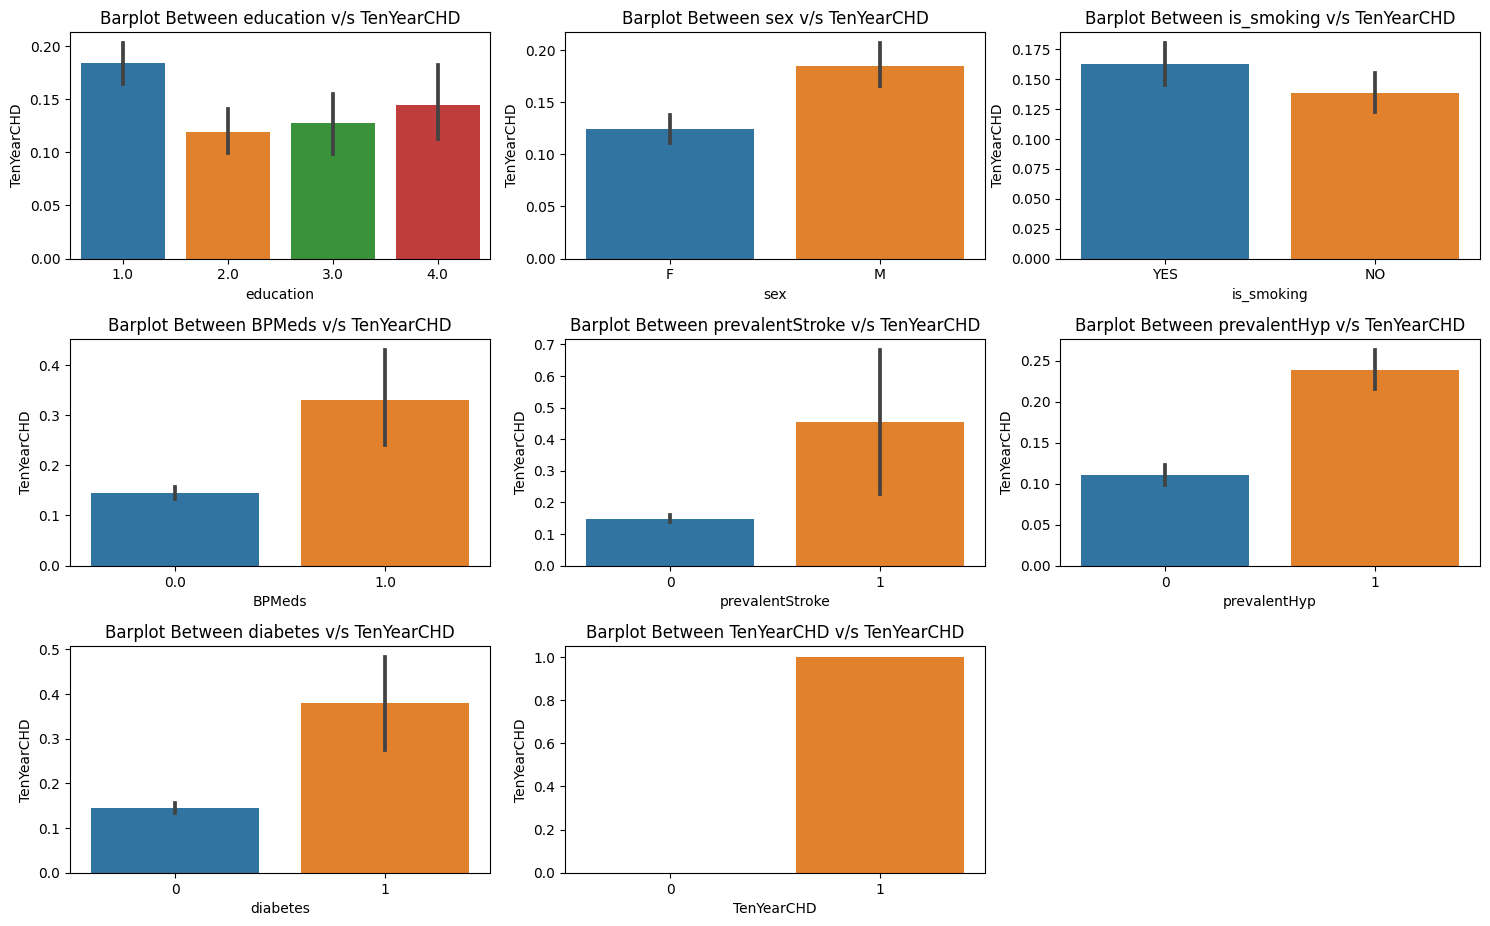

In [ ]:
#visualization code
# Bar plot between categorical column (containing two or four values) and the target variable
plt.figure(figsize=(15,12))
for i,col in enumerate(categorical_var):
    plt.subplot(4,3,i+1)
    sns.barplot(x=cvrp_data[col], y=cvrp_data['TenYearCHD'])
    plt.title(f'Barplot Between {col} v/s TenYearCHD')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for this use case because it clearly visualizes the frequency and sum of each category, making it easy to compare the number of bike rentals per month. It also allows you to quickly spot any trends in the data, such as an increase or decrease in bike rentals over time.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained using the above plots.
* Chances of getting CHD is more if they have diabetes.

* People having education level 1 are prone to getting CHD followed by level 4, and least of level 2.

* The probability of getting CHD is more in males.

* The people who are taking BP meds are at high risk of getting CHD.

* People have high probability of getting CHD who had earlier prevalent stroke.
* People have high probability of getting CHD who had earlier prevalent hypertension.

* The probability of getting CHD is more in people who smoke compared to the people who don't.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart reflects lot of insights, and it can be used for feature engineering. And this will lead to positive business impact.

### **`5).Education level vs no of patients(bi-variate)`**

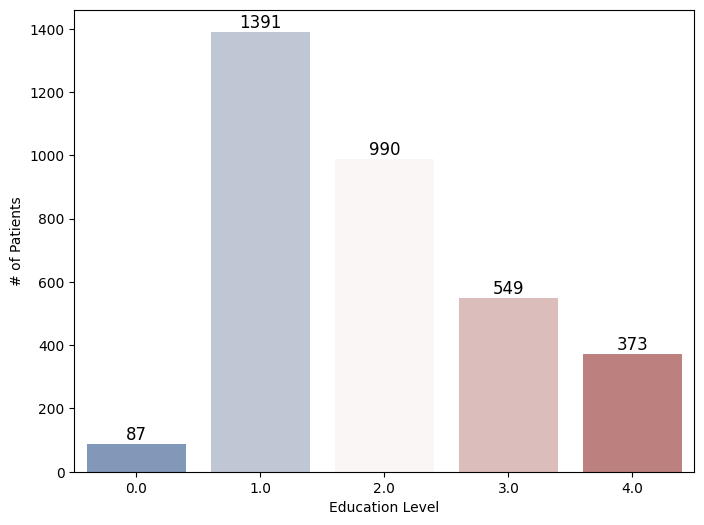

In [ ]:
#visualization code
#copy data for grouping data with respect of CVD
edu = cvrp_data.copy()
#education null value define as 0
edu.education = edu.education.fillna(value=0)
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot (x='education', data = edu, palette= 'vlag')
ax.set(xlabel='Education Level', ylabel='# of Patients')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar plots are a commonly used visualization tool in data analysis and data science, and they are a key component of the matplotlib library in Python. Bar plots are important because they allow you to quickly and easily visualize and compare the values of categorical data. They are especially useful when you want to compare the frequency or distribution of different categories of data.

##### 2. What is/are the insight(s) found from the chart?

The following insights are extracted from the above bar plot chart.
* 87 people have education level 0 which means unknown education status.
* 1391 people have education level 1.
* 990 people have education level 2.
* 550 people have education level 3.
* 373 people have education level 4


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information only tells us about the number of patient present in our dataset and their education level. This varaible is generaly doesn't causes much effect on our target variable (TenYearCHD).

### **`6).Plot between age and TenYearCHD (Bivariate)`**

Text(0.5, 1.0, 'CVD with respect of Age')

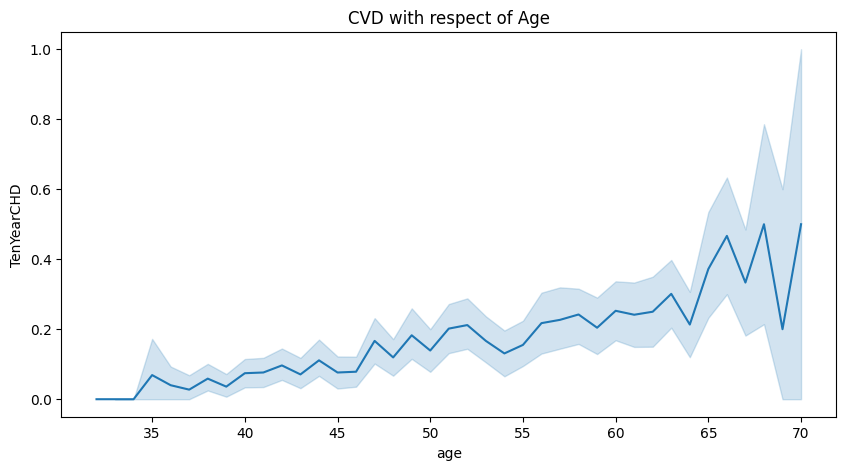

In [ ]:
#visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='age', y="TenYearCHD", data=cvrp_data)
plt.title("CVD with respect of Age")

##### 1. Why did you pick the specific chart?

To check the linear relationship between age and target variable (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that the chances of getting CHD is proportional to the age. So, if a person is aged he has high risk of getting CHD and vice-versa.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting CHD because the target variable and age are possitively correlated.

### **`7).Plot between BMI and TenYearCHD (Bivariate)`**

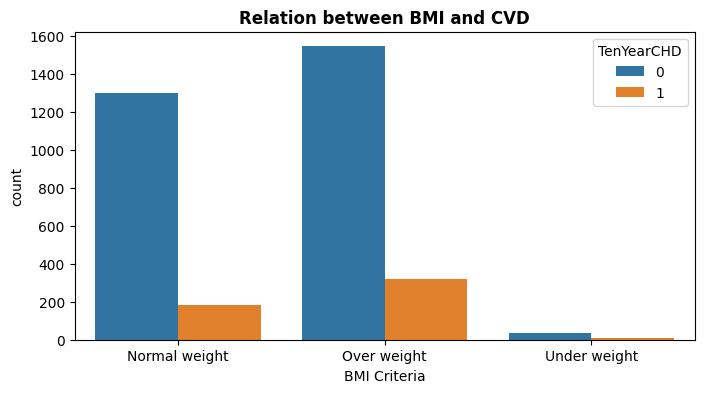

In [ ]:
#visualization code
#copy data
df_vis=cvrp_data.copy()
#lets convert data in categorical form
#Under weight <=18.5, Normal weight = 18.5 to 24.9 ,Over weight=above 25 bmi
df_vis['BMI Criteria'] = cvrp_data['BMI'].apply(lambda x: 'Under weight' if x <=18.5 else ('Normal weight' if 18.5 < x <=24.9 else 'Over weight' ))
dfplot_count=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts()
dfplot_per=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([dfplot_count,dfplot_per], axis=1, keys=['count','Risk of THD']).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=ma_con['BMI Criteria'], y=ma_con['count'],hue=ma_con['TenYearCHD'])
plt.title("Relation between BMI and CVD",weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

### **`8).Plot between Heart Rate and TenYearCHD`**

Text(0.5, 1.0, 'Distributions of Gender Vs heart_rate with Target class')

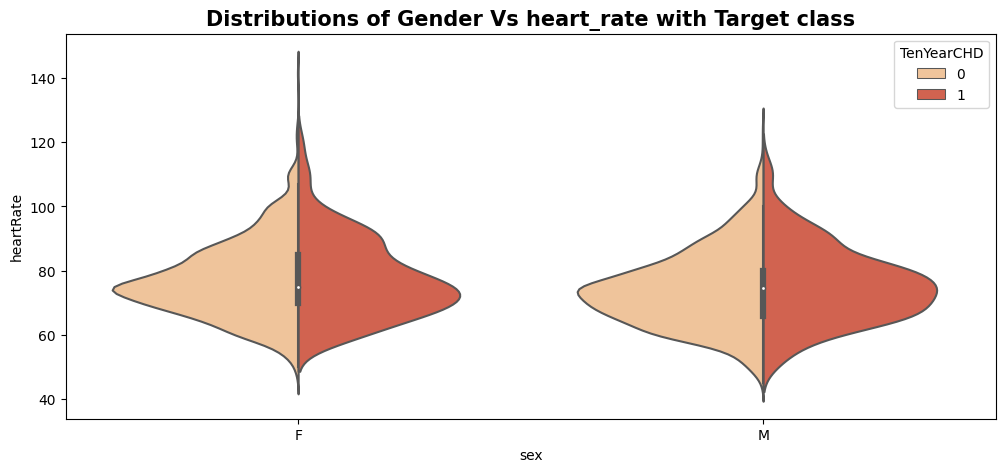

In [ ]:
#visualization code
plt.figure(figsize=(12,5))
sns.violinplot(data=cvrp_data,x="sex", y='heartRate',hue="TenYearCHD",palette = 'OrRd', split=True,ax=None)
plt.title("Distributions of Gender Vs heart_rate with Target class",fontsize=15,weight='bold')

##### 1. Why did you pick the specific chart?

A violin plot is a data visualization technique used in data science to display the distribution and density of a continuous variable or numerical data. It is similar to a box plot but provides more information about the distribution of the data by showing the shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

 As we can see from the violin plot, females have higher heart rates than males to devolop CHD.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps us to conclude a relationship between the TenYearCHD and heart rate and sex. And it helps the healthcare industries while predicting whether a person will get a CHD or not.

### **`9).Plot between age and Cigarette per day (Bivariate)`**

Text(0.5, 1.0, 'Cigarette consumption with respect of Age')

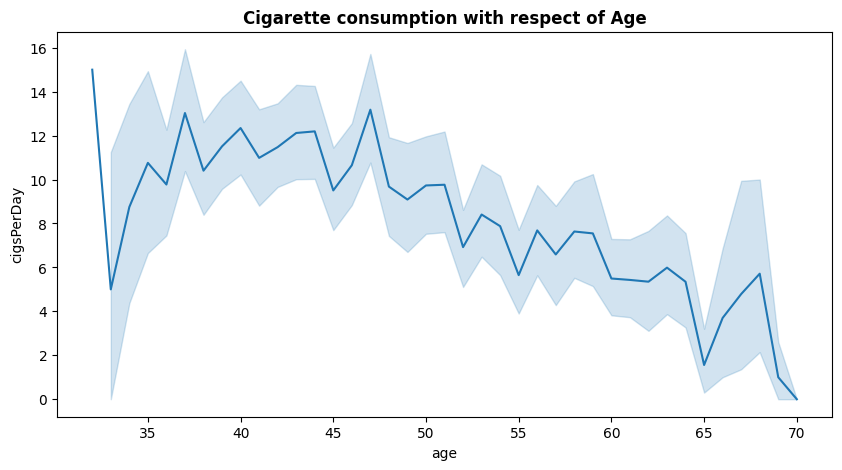

In [ ]:
#visualization code
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y="cigsPerDay", data=cvrp_data)
plt.title("Cigarette consumption with respect of Age",weight='bold')

##### 1. Why did you pick the specific chart?


To check the patterns between independent variable age with our dependent variable Cigarette per day  we used this lineplot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that as the age of people increases the cigarette per day consume by people decreases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting which age group people are consuming more cigarette per day.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***